In [1]:
from Bio import SeqIO, pairwise2
from Bio.SeqUtils import GC, MeltingTemp as mt, molecular_weight as mw, nt_search
from collections import Counter
from matplotlib import pyplot as plt
from Levenshtein import distance

In [4]:
record = SeqIO.read('e.fasta', 'fasta')
seqA = record.seq
print("seq A:", seqA)
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

seq A: CAAACAAGGCCCACACTGGACAGGGCAGCTGCTGGGTTGCTACTCTCGCCTCCGCCATGATTCCGCCCGCAGACTCTTTTGCTCAAGTACGACACCCCAGTGCTGGTGAGCCGGAACACGGAGAAACGGAGCCCCAAGGTCGGCTACTGAAAGTCAGCCCCCAGCAGCCTGGACCTTCAGGTTCAGCCCCACAGCCACCCAAGACCAAGCTCCCCTCAACTCCCTGTGTCCCAGATCCTACAAAGCAGGCAGAAGAAATCTTGAATGCCATACTACCCCCAAGGGAGTGGGTGGAAGACACGCAGCTATGGATCCAGCAGGTGTCCAGCACCCCTACGCACCAGGATGGACGTGGTGCACCTCCAGGAGCAGTTAGACTTAAAGCTGCAGCAGCGGCAGGCCAGGGAAACAGGCATCTGCCCTGTCCGCAGGAACTCTACTCACAGTGTTTTGATGAGTTGATCCGGGAGTCACCATCAACTGTGCGGAGAGGGGGCTGCTGCTGCTGCAGTCGGGACGAGATCCGCATGACCATCGCTGCCTACCAGACCCTGTACGAGAGCAGCGTGGCGTTTGGCATGAGGAAGGCACTGCAGGCTGAGCAGGGGAAGTCAGACATGGAGAGGAAAATCGCAGAATTGGAGACGGAAAAGAGAGACCTGGAGAGGCAAGTGAACGAGCAGAAGGCAAAATGTGAAGCCACTGAGAAGCGGGAGAGCGAGAGGCGGCAGGTGGAGGAGAAGAAGCACAATGAGGAGATTCAGTTCCTGAAGCGAACAAATCAGCAGCTGAAGGCCCAACTGGAAGGCATTATTGCACCAAAGAAGTGATAATTTCCACATGATTAATTTCCAACAAGACACTTGGGAGTTATTTACTGTGTTCCTCTGGCAGCCAATAAAATCATCATAAGCCCTTTGT
length: 921
complement: GTTTGTTCCGGGTGTGACCTGTCCCGTCGACGACCCAACGATGAGAG

In [5]:
seqPart = seqA[99: 200]
print("part from 100 to 200:", seqA)
print("length:", len(seqPart))

part from 100 to 200: CAAACAAGGCCCACACTGGACAGGGCAGCTGCTGGGTTGCTACTCTCGCCTCCGCCATGATTCCGCCCGCAGACTCTTTTGCTCAAGTACGACACCCCAGTGCTGGTGAGCCGGAACACGGAGAAACGGAGCCCCAAGGTCGGCTACTGAAAGTCAGCCCCCAGCAGCCTGGACCTTCAGGTTCAGCCCCACAGCCACCCAAGACCAAGCTCCCCTCAACTCCCTGTGTCCCAGATCCTACAAAGCAGGCAGAAGAAATCTTGAATGCCATACTACCCCCAAGGGAGTGGGTGGAAGACACGCAGCTATGGATCCAGCAGGTGTCCAGCACCCCTACGCACCAGGATGGACGTGGTGCACCTCCAGGAGCAGTTAGACTTAAAGCTGCAGCAGCGGCAGGCCAGGGAAACAGGCATCTGCCCTGTCCGCAGGAACTCTACTCACAGTGTTTTGATGAGTTGATCCGGGAGTCACCATCAACTGTGCGGAGAGGGGGCTGCTGCTGCTGCAGTCGGGACGAGATCCGCATGACCATCGCTGCCTACCAGACCCTGTACGAGAGCAGCGTGGCGTTTGGCATGAGGAAGGCACTGCAGGCTGAGCAGGGGAAGTCAGACATGGAGAGGAAAATCGCAGAATTGGAGACGGAAAAGAGAGACCTGGAGAGGCAAGTGAACGAGCAGAAGGCAAAATGTGAAGCCACTGAGAAGCGGGAGAGCGAGAGGCGGCAGGTGGAGGAGAAGAAGCACAATGAGGAGATTCAGTTCCTGAAGCGAACAAATCAGCAGCTGAAGGCCCAACTGGAAGGCATTATTGCACCAAAGAAGTGATAATTTCCACATGATTAATTTCCAACAAGACACTTGGGAGTTATTTACTGTGTTCCTCTGGCAGCCAATAAAATCATCATAAGCCCTTTGT
length: 101


In [9]:
nt_search(str(seqA), 'ATCG')

['ATCG', 533, 629]

In [12]:
temp = [x for x in seqA if x in 'AGCT']
temp = ''.join(temp)
print("length temp:", len(temp))
print("GC:", GC(temp))
print("AT:", 100-GC(temp))

length temp: 921
GC: 55.04885993485342
AT: 44.95114006514658


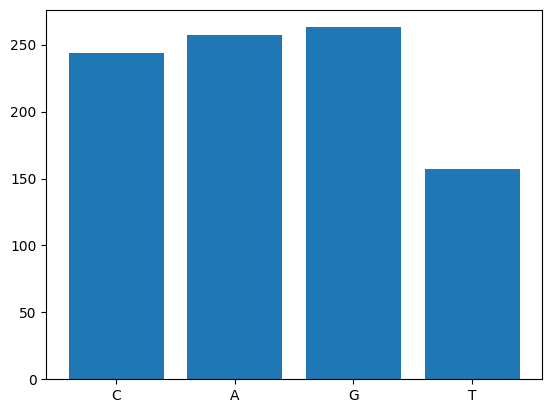

In [11]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())
plt.show()

In [13]:
print("tm_wallace:", mt.Tm_Wallace(seqA))
print("tm_gc:", mt.Tm_GC(seqA))
print("tm_NN:", mt.Tm_NN(seqA))

tm_wallace: 2856.0
tm_gc: 81.57345904065946
tm_NN: 84.902925217264


In [14]:
print("molecular weight:", mw(seqA))

molecular weight: 285411.9291000002


In [15]:
seqB = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
globalAlignmx = pairwise2.align.globalmx(seqA, seqB, 2, -1)
print(pairwise2.format_alignment(*globalAlignmx[0]))

CAAAC-A-AGGCCCACACTGG--AC-AGG-GCAGC--TGCTGGGTTGCTACTC---TCG-CCTCCGC-CATGAT--T--CCGC-C-CGCAGACTCT-TTTGCTCAAGTACGACACCCCAGTG-CTGGTGAGCCGG--AAC--------AC---GGAGAAACGGAG-C--C----C-CA-AG--GT-CGGC-TACTGAAAG-TCAGCCC---CCA-GCAGCCTGGACCTTCAGGTTCAGCCCCA----CAGCCACCCAA-GACCA--AGCTCCCCTCAACTC-C--C-TGTGTCCCAGATCCTA--C----A--A-AGCAGGCA-G-AAG-AA-A-TC--TTGAATGCCATACT--AC----C-C-C-CAAGGGAGTGGGTGGAAGACA-C-G-CAGC-TATGGATCCAGCAGGTGTCCAGC-ACCCCTACG-CAC-CAGGATG--GAC-GTG--GTGCACC---TCCAGG-AGCAGTTAG-ACTTA-AAGC--TGC--AGCAG-CG--GCAGGCCAGG---GAAA-CAG----GC-ATC---TGCCCTGTCCGCAGGA-ACTC-TACT-C-A--CAGTGTTT-TGATGAG---T---TG-AT----CCGG---GAGTCACC---ATC-A--ACTGTG-CGGAGAGGGGG-CTGCTGCTGCTG-C-AG-TCGG-GACGAGATCC-GCATGA--C--CATC---G--CTGC--CTA---CCAGACCCTGTACGAGAGCAG-CGTGGC--GTTTGGCATG--AGGAAGGCACT-GCAGGCTG-AG--C-AG-G--GGA-AGT--C-A--GACATGGAG-AGGAAAATCGCA--GAAT-T-GGAG--ACGGAA-AAGA--G-AGA-C-CTG-GAG--AGGCAAG-TGAACGAGCAGA-AGG--CA-A-A-ATG-TGAAGCCA-CTGA-GAAG-CGGG-AGAGCGAGAGGCGG-CAGGTG-GAGG-------AGAAGAA-GCACAATGAGGAGA-TTCAGT--TC

In [16]:
def hamming(seq1, seq2):
    return len([(x,y) for x,y in zip(seq1, seq2) if x != y])

seqC = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
print("hamming:", hamming(seqA, seqC))

hamming: 114


In [17]:
seqD = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
print("levenshtein distance:", distance(seqA, seqD))

levenshtein distance: 644
